<a href="https://colab.research.google.com/github/TestPrab/Python-Projects/blob/master/CaseStudyPorter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1WFa46c7_uSZ6GSzgYrDk4TKJd3y9zv8f

Downloading...
From: https://drive.google.com/uc?id=1WFa46c7_uSZ6GSzgYrDk4TKJd3y9zv8f
To: /content/data_2.csv
100% 15.7M/15.7M [00:00<00:00, 114MB/s] 


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredError,MeanSquaredLogarithmicError,MeanAbsolutePercentageError

from tensorflow.keras.metrics import mean_absolute_percentage_error, RootMeanSquaredError,MeanAbsoluteError
from tensorflow.keras.optimizers import SGD,Adam
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

In [ ]:
df=pd.read_csv('/content/data_2.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

In [ ]:
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])
df['time_taken']=df['actual_delivery_time']-df['created_at']
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00


In [ ]:
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken,time_taken_mins
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00,46.0


In [ ]:
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken,time_taken_mins,hour,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00,47.0,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00,44.0,21,1
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00,55.0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00,59.0,3,3
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00,46.0,2,1


In [ ]:
df.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   store_primary_category                        175777 non-null  int64  
 2   order_protocol                                175777 non-null  float64
 3   total_items                                   175777 non-null  int64  
 4   subtotal                                      175777 non-null  int64  
 5   num_distinct_items                            175777 non-null  int64  
 6   min_item_price                                175777 non-null  int64  
 7   max_item_price                                175777 non-null  int64  
 8   total_onshift_dashers                         175777 non-null  float64
 9   total_busy_dashers                            17

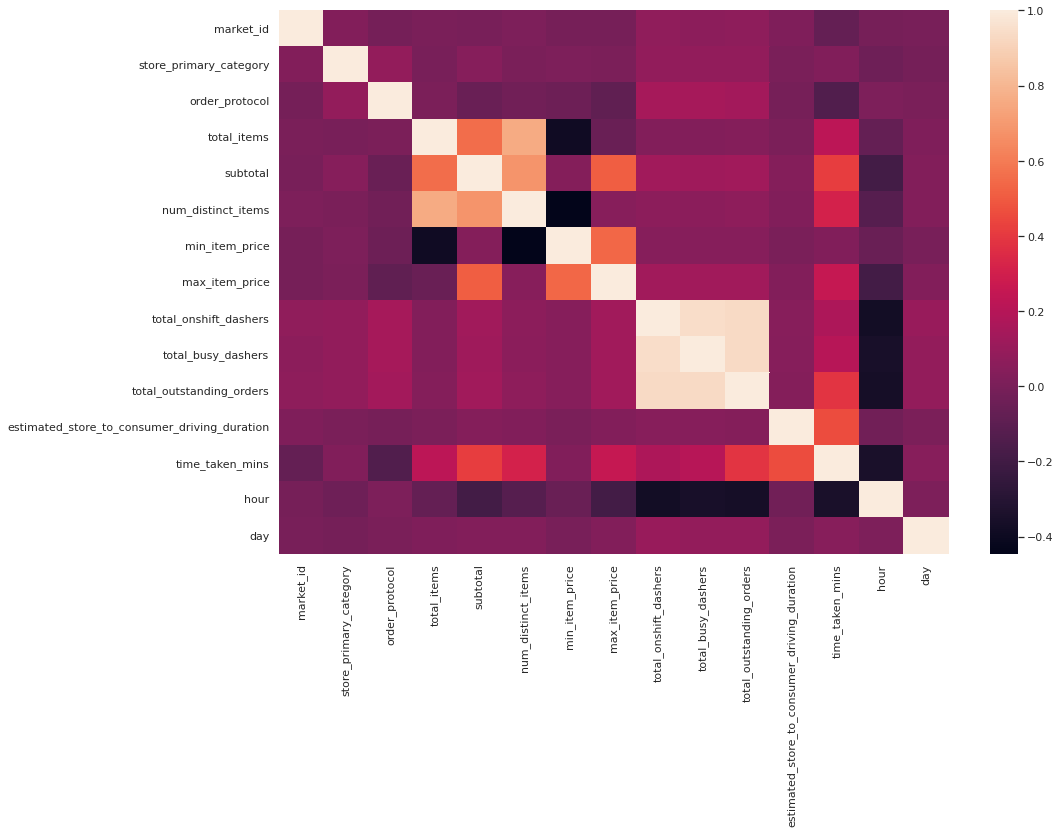

In [ ]:
sns.heatmap(df.corr())

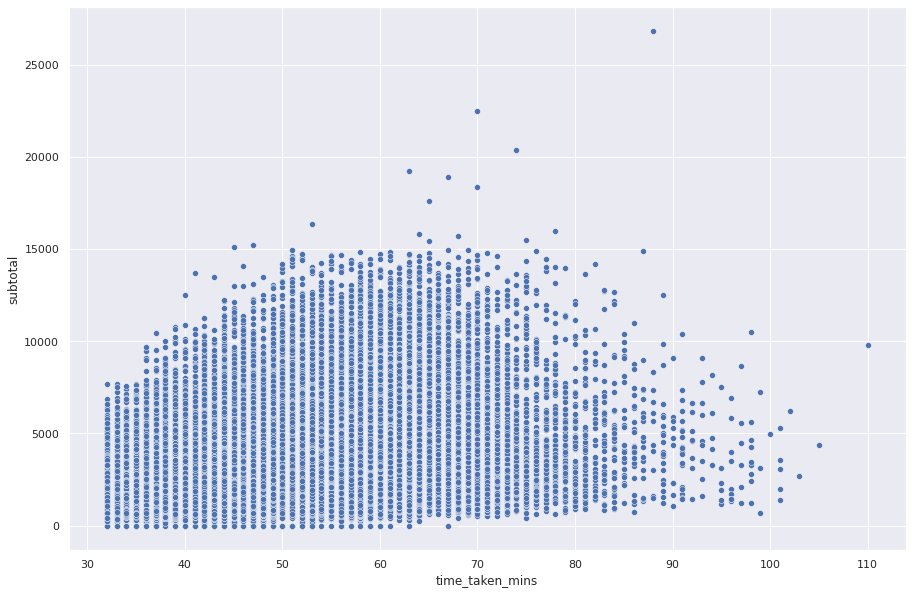

In [ ]:
sns.scatterplot(x='time_taken_mins',y='subtotal',data=df)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
modell=LocalOutlierFactor()
df['lof_anomaly_score']=modell.fit_predict(df)

In [41]:
print('number of outliers: ',(len(df.loc[(df['lof_anomaly_score']==-1)])))
df=df.loc[(df['lof_anomaly_score']==1)]

number of outliers:  831


We have removed all the outliers that had score of -1 

In [43]:
df['lof_anomaly_score'].value_counts()

1    174946
Name: lof_anomaly_score, dtype: int64

In [45]:
df.drop(['lof_anomaly_score'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174946 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     174946 non-null  float64
 1   store_primary_category                        174946 non-null  int64  
 2   order_protocol                                174946 non-null  float64
 3   total_items                                   174946 non-null  int64  
 4   subtotal                                      174946 non-null  int64  
 5   num_distinct_items                            174946 non-null  int64  
 6   min_item_price                                174946 non-null  int64  
 7   max_item_price                                174946 non-null  int64  
 8   total_onshift_dashers                         174946 non-null  float64
 9   total_busy_dashers                            17

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


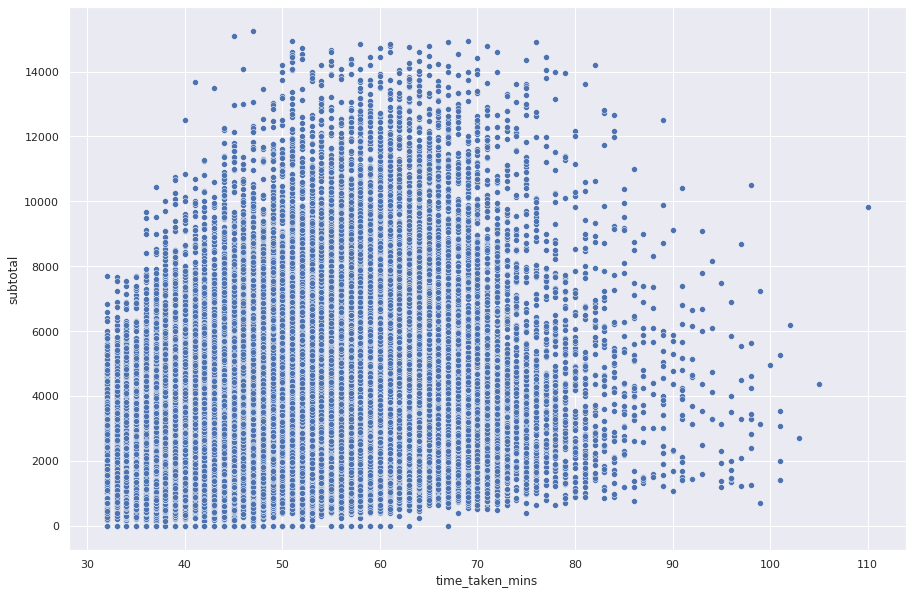

In [44]:
sns.scatterplot(x='time_taken_mins',y='subtotal',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


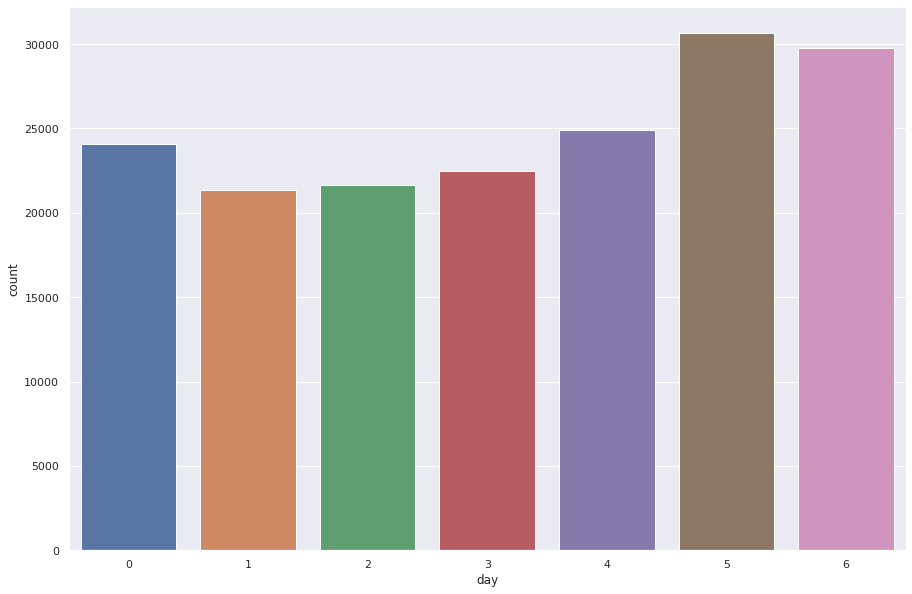

In [46]:
sns.countplot(df.day)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


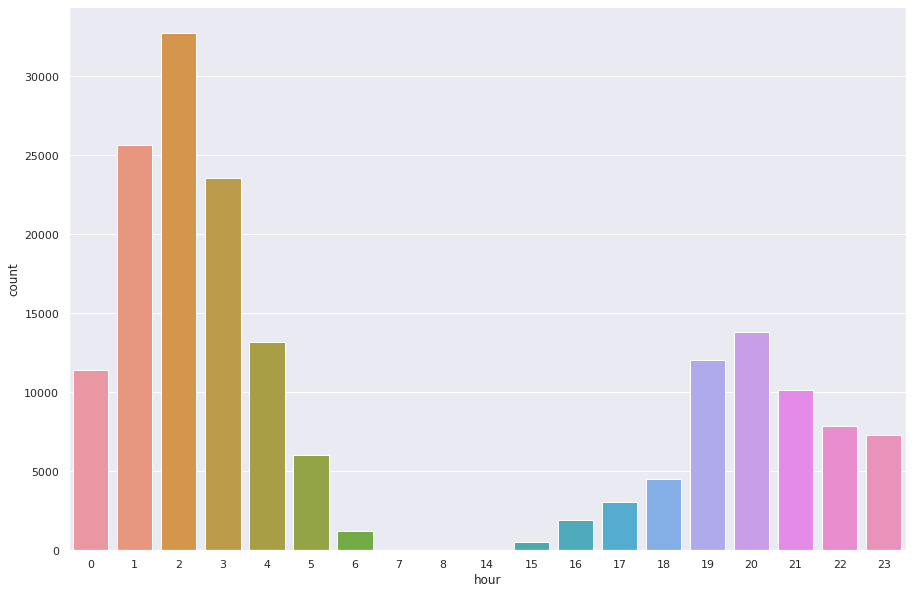

In [48]:
sns.countplot(df.hour)

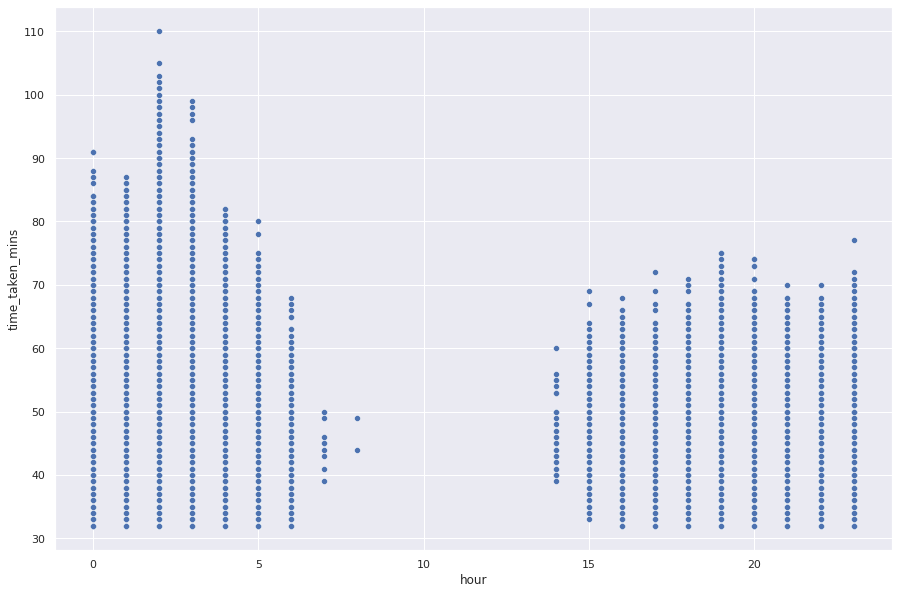

In [50]:
sns.scatterplot(x='hour',y='time_taken_mins',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


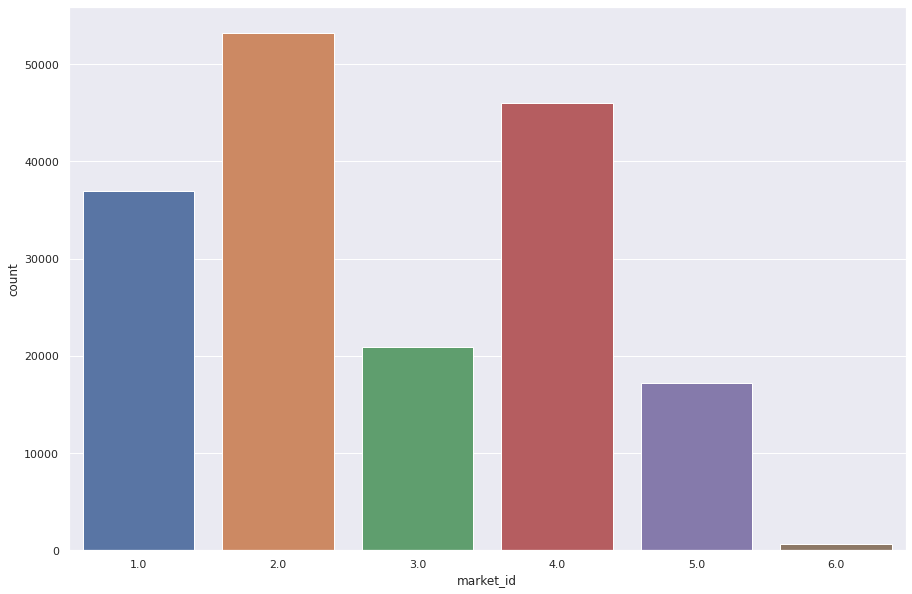

In [52]:
sns.countplot(df.market_id)

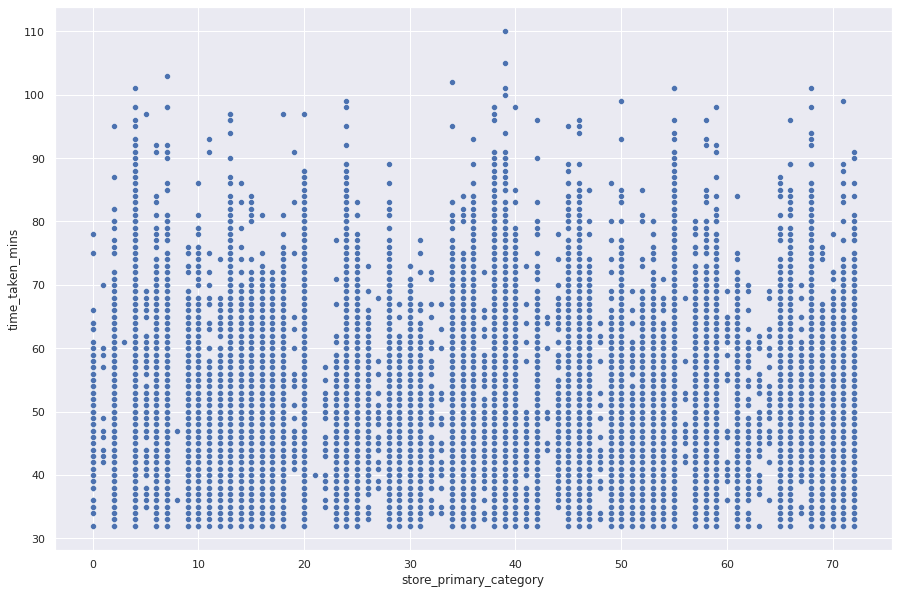

In [64]:
sns.scatterplot(x='store_primary_category',y='time_taken_mins',data=df)

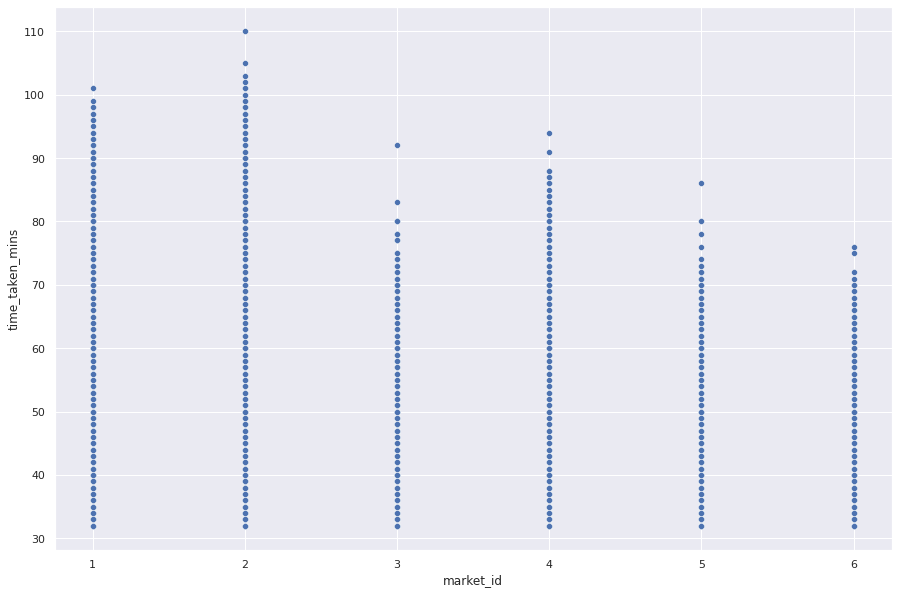

In [65]:
sns.scatterplot(x='market_id',y='time_taken_mins',data=df)

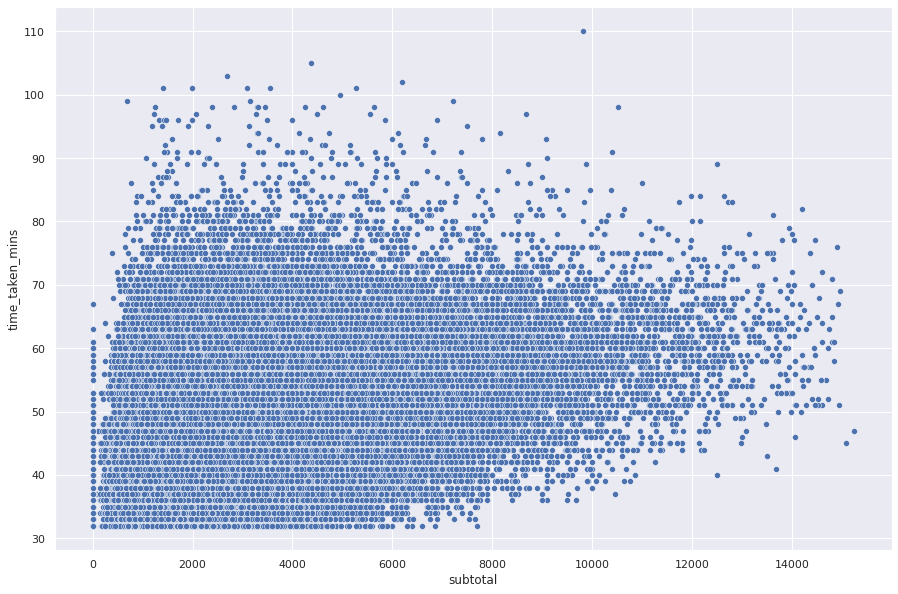

In [54]:
sns.scatterplot(x='subtotal',y='time_taken_mins',data=df)

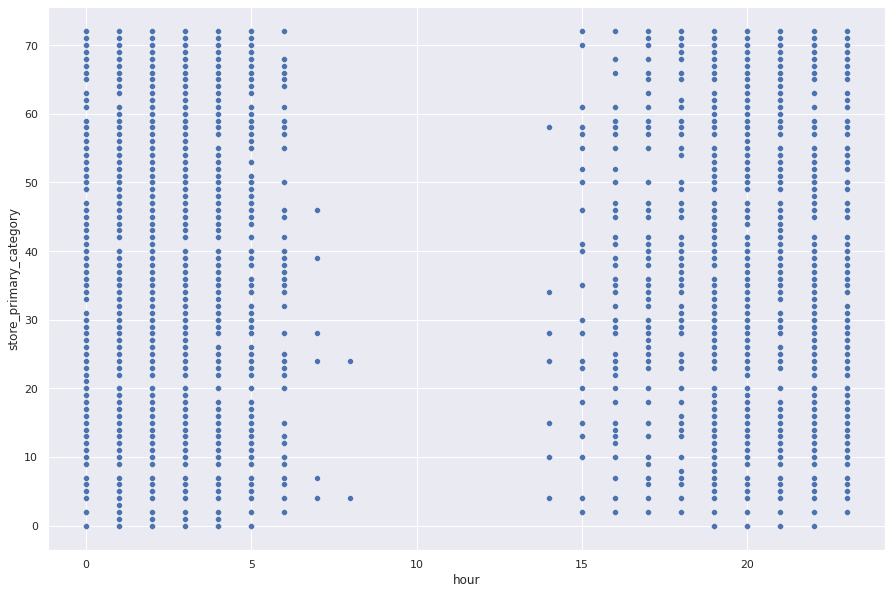

In [67]:
sns.scatterplot(x='hour',y='store_primary_category',data=df)

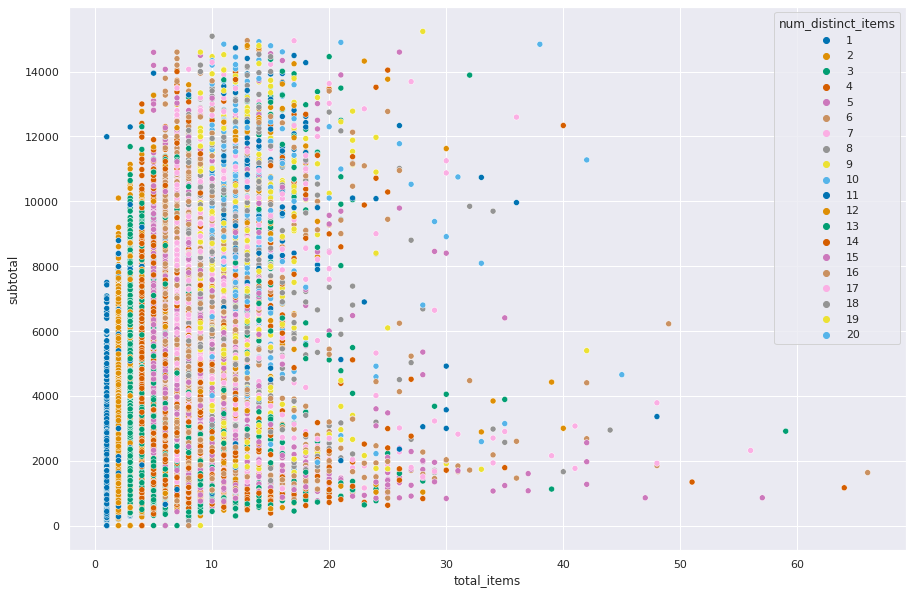

In [70]:
sns.scatterplot(x='total_items',y='subtotal',data=df,palette='colorblind',hue='num_distinct_items')

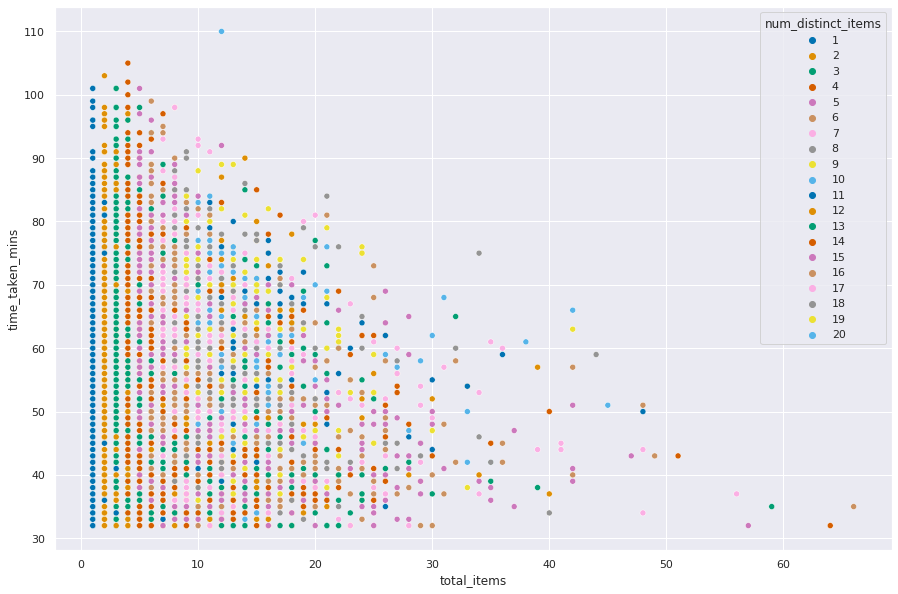

In [76]:
sns.scatterplot(x='total_items',y='time_taken_mins',data=df,palette='colorblind',hue='num_distinct_items')

In [91]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [83]:
X=df.drop(['time_taken_mins'],axis=1)
Y=df['time_taken_mins']

In [84]:
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=7,shuffle=True)

In [94]:
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 2.203 (0.021)


In [97]:
model.fit(X_train,y_train)

[16:46:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [99]:
results=model.predict(X_test)

In [102]:
mse=mean_squared_error(y_test,results)
rmse=mse**.5
print(mse)
print(rmse)
mae=mean_absolute_error(y_test,results)
print(mae)
r2_val=r2_score(y_test,results)
print(r2_val)

8.941081854146551
2.990164185148794
2.2177951159699365
0.8965503305319205


In [103]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [104]:
results=regressor.predict(X_test)
mse=mean_squared_error(y_test,results)
rmse=mse**.5
print(mse)
print(rmse)
mae=mean_absolute_error(y_test,results)
print(mae)
r2_val=r2_score(y_test,results)
print(r2_val)

3.2300339639897113
1.7972295245710024
1.2928448128036583
0.9626280184661947


In [105]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Random Forest Importance')

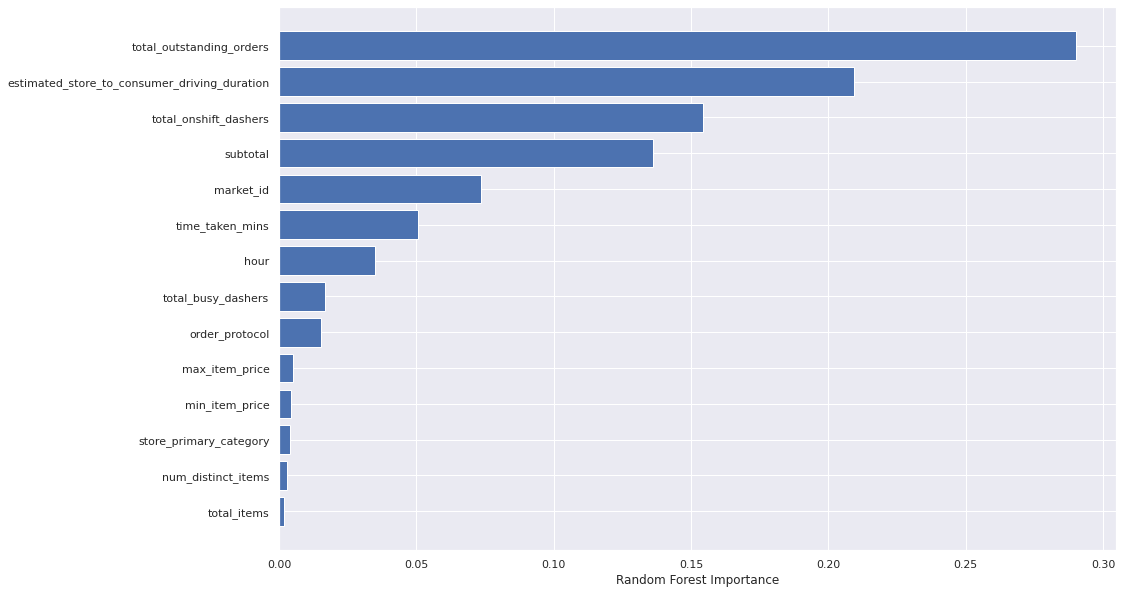

In [112]:
indexs=np.argsort(regressor.feature_importances_)

plt.barh(df.columns[indexs],regressor.feature_importances_[indexs])
plt.xlabel('Random Forest Importance')

In [113]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.25,random_state=89)


In [116]:
from tensorflow.keras.optimizers import Adam

In [120]:
model=Sequential()
model.add(Dense(14,kernel_initializer='normal',activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='relu'))
adam=Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=adam,metrics=['mse','mae','accuracy'])
history=model.fit(X_train,y_train,epochs=50,batch_size=256,verbose=1,validation_split=0.30)

Epoch 1/50
359/359 [==============================] - 19s 48ms/step - loss: 128.2373 - mse: 128.2373 - mae: 5.9397 - accuracy: 0.0000e+00 - val_loss: 4.4026 - val_mse: 4.4026 - val_mae: 1.5686 - val_accuracy: 0.0000e+00
Epoch 2/50
359/359 [==============================] - 17s 47ms/step - loss: 3.0185 - mse: 3.0185 - mae: 1.2514 - accuracy: 0.0000e+00 - val_loss: 2.1049 - val_mse: 2.1049 - val_mae: 1.0414 - val_accuracy: 0.0000e+00
Epoch 3/50
359/359 [==============================] - 17s 47ms/step - loss: 1.8406 - mse: 1.8406 - mae: 0.9803 - accuracy: 0.0000e+00 - val_loss: 1.4774 - val_mse: 1.4774 - val_mae: 0.8753 - val_accuracy: 0.0000e+00
Epoch 4/50
359/359 [==============================] - 18s 51ms/step - loss: 1.4283 - mse: 1.4283 - mae: 0.8647 - accuracy: 0.0000e+00 - val_loss: 1.3696 - val_mse: 1.3696 - val_mae: 0.8647 - val_accuracy: 0.0000e+00
Epoch 5/50
359/359 [==============================] - 17s 46ms/step - loss: 1.1823 - mse: 1.1823 - mae: 0.7800 - accuracy: 0.0000e+0

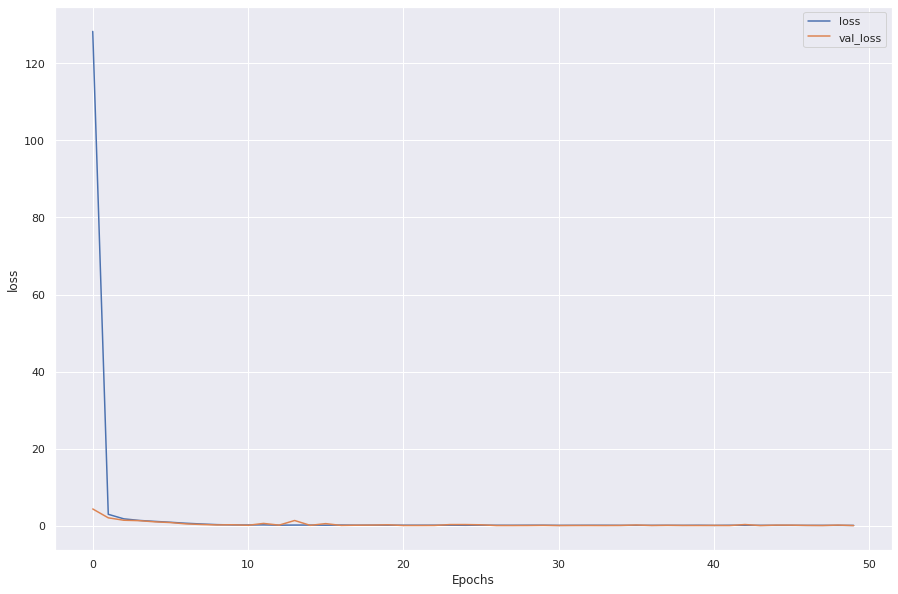

In [125]:
def plot_history(history,key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel('Epochs')
  plt.ylabel(key)
  plt.legend([key,'val_'+key])
  plt.show()

plot_history(history,'loss')

In [127]:
results=model.predict(X_test)
mse=mean_squared_error(y_test,results)
rmse=mse**.5
print(mse)
print(rmse)
mae=mean_absolute_error(y_test,results)
print(mae)
r2_val=r2_score(y_test,results)
print(r2_val)

1367/1367 [==============================] - 6s 4ms/step
0.09140272033844866
0.30232882816305934
0.2566321140307361
0.9989393674686148
